**Task 1: Exploratory Data Analysis (EDA)**


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customers Dataset Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Customers Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Duplicate Records: 0

Products Dataset Info:
<class 'pandas.core.frame.Dat

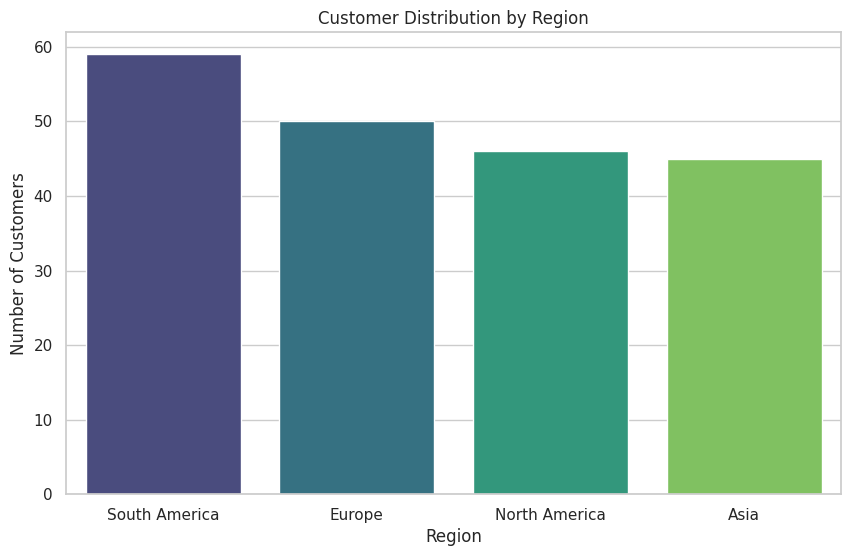

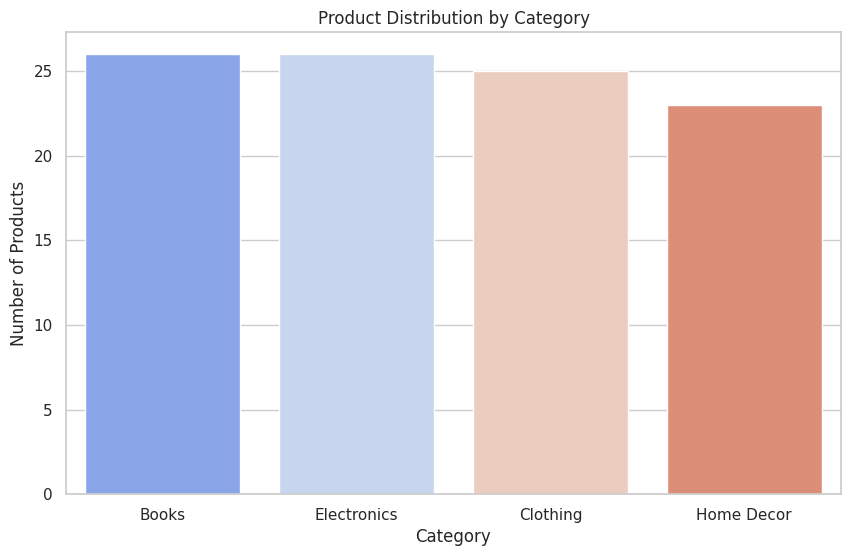


Basic Statistics of Transactions:
          Quantity   TotalValue  TransactionPrice
count  1000.000000  1000.000000        1000.00000
mean      2.537000   689.995560         272.55407
std       1.117981   493.144478         140.73639
min       1.000000    16.080000          16.08000
25%       2.000000   295.295000         147.95000
50%       3.000000   588.880000         299.93000
75%       4.000000  1011.660000         404.40000
max       4.000000  1991.040000         497.76000


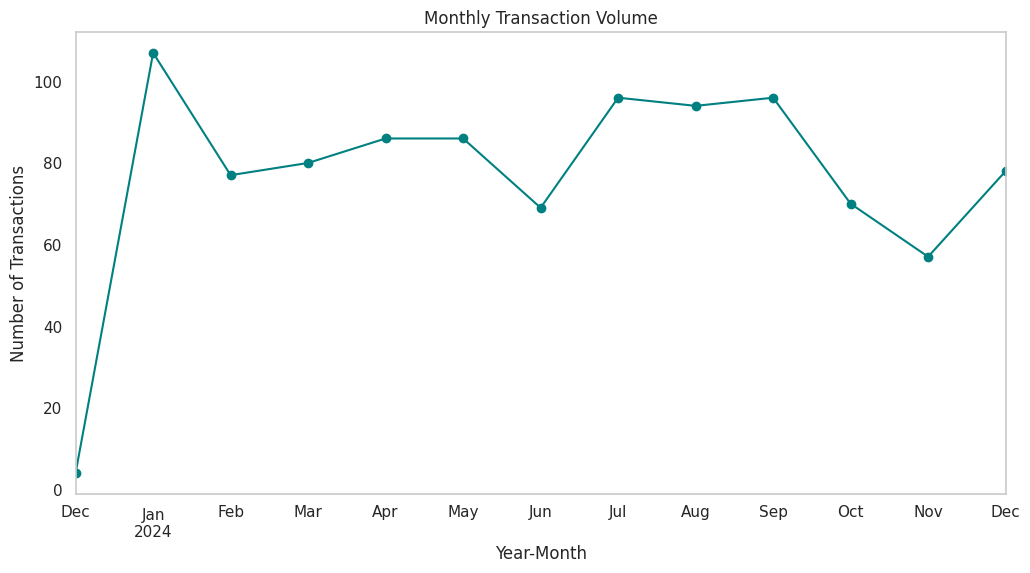

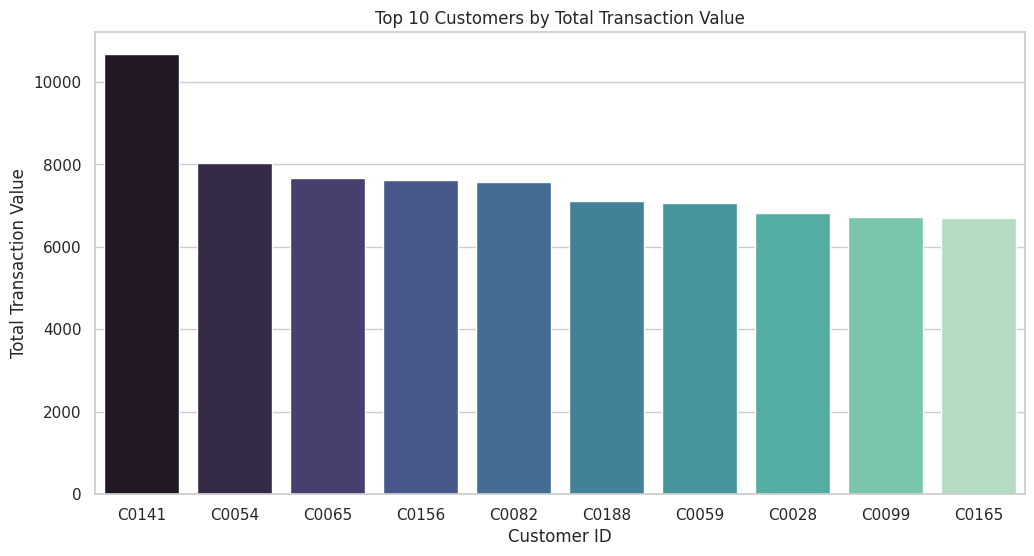

Correlation between Transaction Price and Total Value: 0.72


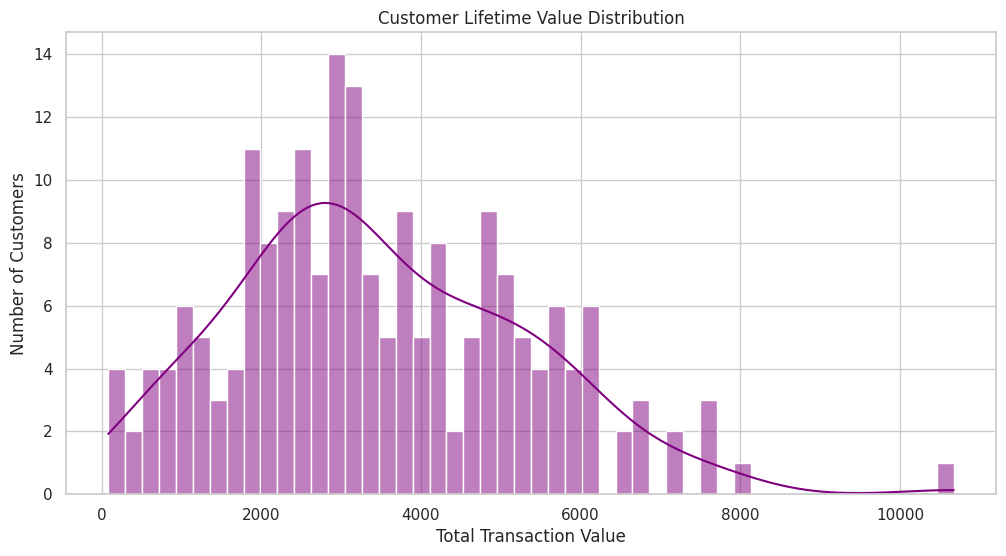

Number of inactive customers: 1


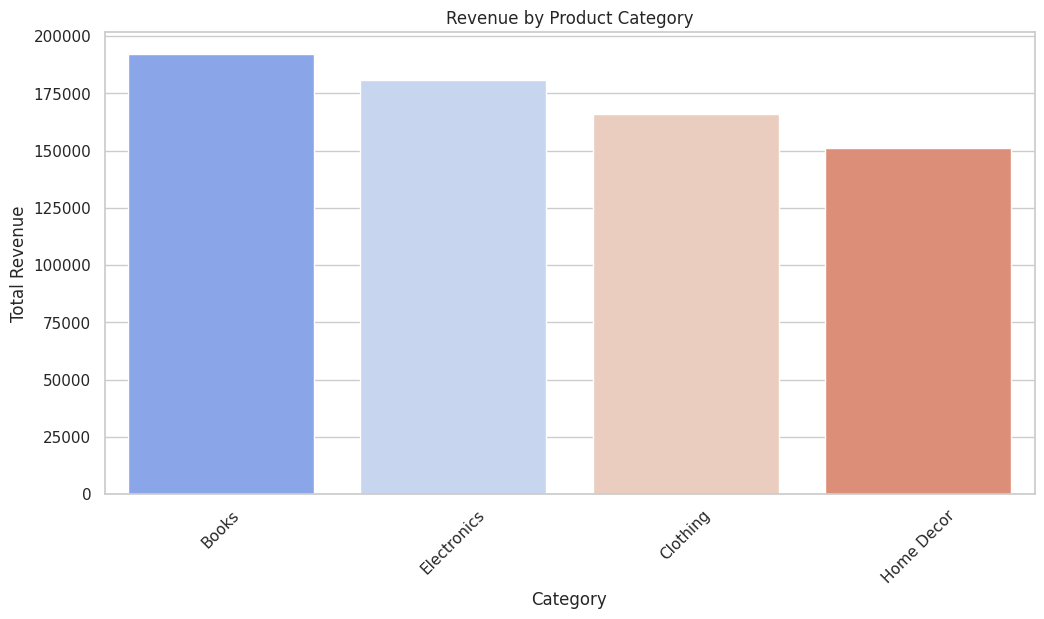

In [ ]:
# Task 1: Exploratory Data Analysis (EDA)

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Setting up visualization styles
sns.set(style="whitegrid")

# Loading the datasets
customers_path = "/content/drive/MyDrive/Zeotap Dataset/Customers.csv"
products_path = "/content/drive/MyDrive/Zeotap Dataset/Products.csv"
transactions_path = "/content/drive/MyDrive/Zeotap Dataset/Transactions.csv"

customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Standardizing column names to avoid case sensitivity issues
customers.columns = customers.columns.str.strip()
products.columns = products.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

# Displaying basic information about each dataset
def dataset_overview(df, name):
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print(f"\n{name} Dataset Head:\n", df.head())
    print(f"\n{name} Missing Values:\n", df.isnull().sum())
    print("\nDuplicate Records:", df.duplicated().sum())

dataset_overview(customers, "Customers")
dataset_overview(products, "Products")
dataset_overview(transactions, "Transactions")

# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Removing duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Merging transactions with products to ensure price is available
merged_data = transactions.merge(products, on='ProductID', how='left')
merged_data = merged_data.merge(customers, on='CustomerID', how='left')

# Renaming price columns for clarity
merged_data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

# Exploratory Analysis on Customers Dataset
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Exploratory Analysis on Products Dataset
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

# Exploratory Analysis on Transactions Dataset
print("\nBasic Statistics of Transactions:")
print(merged_data[['Quantity', 'TotalValue', 'TransactionPrice']].describe())

# Monthly transaction volume
monthly_transactions = transactions.groupby('YearMonth').size()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Transaction Volume")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

# Analyzing top customers by transaction value
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="mako")
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value")
plt.show()

# Advanced Statistical Analysis
correlation, _ = pearsonr(merged_data['TransactionPrice'], merged_data['TotalValue'])
print(f"Correlation between Transaction Price and Total Value: {correlation:.2f}")

# Customer Lifetime Value (CLV)
customer_ltv = merged_data.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sns.histplot(customer_ltv, bins=50, kde=True, color='purple')
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("Total Transaction Value")
plt.ylabel("Number of Customers")
plt.show()

# Churn Analysis (Inactive Customers)
inactive_customers = customers[~customers['CustomerID'].isin(transactions['CustomerID'])]
print(f"Number of inactive customers: {len(inactive_customers)}")

# Revenue Trends by Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()